# SVR

### Dataset : Admission_Predict

### Link : https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

### Objective : Build a Model that cal predict the Chance of getting addmission using SVR algorithm


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data Ingestion
data = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

# EDA

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
data.shape

(500, 9)

### Observation & Conclusion:

1. Here Chance of Admission is our Dependent Feature

2. All the Features are Numerical, so we don't need to sagregate the Features

3. We need to check for Null values, Outliers.

4. Also need to decide if Standardization is required or not.


## Null values

In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### No Null values found.

## Outliers

<AxesSubplot:>

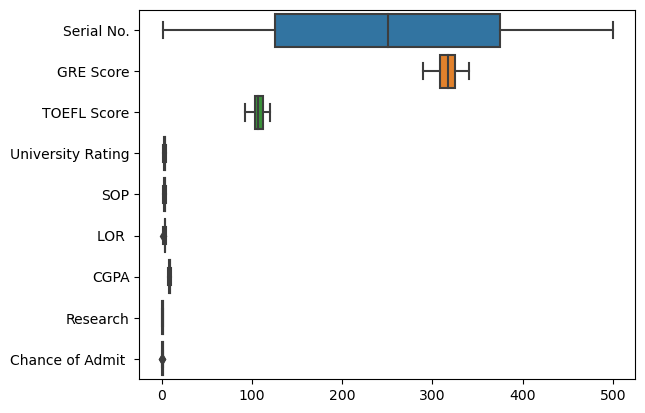

In [19]:
sns.boxplot(data=data, orient="h")

#### No Considerable outliers found

## If Standardization is required or not.

In [8]:
# features with deviation > 10
[col for col in data.columns if data[col].max() - data[col].min() > 10]

['Serial No.', 'GRE Score', 'TOEFL Score']

#### We need to apply standardization

# Feature Engineering

In [16]:
# Seperating Independent and Dependent Features
X = data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = data['Chance of Admit ']

In [20]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [21]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_tf = scaler.fit_transform(X)

### Split of Test and Train Data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.33, random_state=42)

### Model Building

In [30]:
from sklearn.svm import SVR

In [31]:
model = SVR()

In [32]:
model.fit(X_train, y_train)

SVR()

### Model Testing

In [33]:
y_pred = model.predict(X_test)

### Check the Accuracy and Performance of the Model

#### R-square

In [52]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
adj_R2 = 1 - ((1 - R2)*((len(X_test) - 1)/(len(X_test) - len(X.columns) - 1)))
print("R2 score = ", round(R2, 4))
print("Adjusted R2 Score = ", round(adj_R2, 4))

R2 score =  0.7603
Adjusted R2 Score =  0.7496
